# Pivot Table Exploration of Suicide Cases From 1985 to 2016

1.Dataset compiles suicide cases from year 1985 to 2016 for each country with age range, sex and generation type specified.

Internet Link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/code

2. Importing computing and visualization libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

3. Checking Basic Information

In [2]:
df=pd.read_csv("master.csv")

In [3]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [4]:
df.tail(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [40]:
df.size

333840

In [5]:
#12 rows and 27280 columns
df.shape

(27820, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
#Checking for null values and column "HDI for year" has over 19000 null values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
#filling in missing values
df.fillna(0, inplace=True)

In [11]:
#Checking if missing values have been rectified
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.0,"2,156,624,900",796,Silent


In [12]:
#Renaming suicides/100k pop
df.rename(columns={'suicides/100k pop':'suicides per 100k pop'},inplace=True)

In [13]:
#Checking if column suicides/100k pop has been changed
df.head(1)

,country,year,sex,age,suicides_no,population,suicides per 100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.0,"2,156,624,900",796,Generation X


In [14]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [15]:
df['country'].value_counts()

Netherlands               382
Austria                   382
Mauritius                 382
Iceland                   382
Israel                    372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [16]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [17]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [18]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [19]:
df['age'].value_counts()

15-24 years    4642
75+ years      4642
35-54 years    4642
55-74 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

4. Visualizations

Text(0.5, 0, 'Suicide_no')

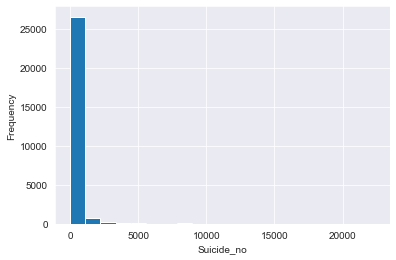

In [20]:
#Most suicides below 5000 casualties
df['suicides_no'].plot(kind='hist', bins=20)
plt.xlabel("Suicide_no")

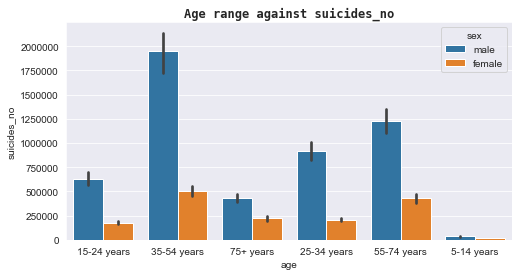

In [21]:
#Most suicide cases are from males in the age range 35-54
plt.figure(figsize=(8,4))
plt.title("Age range against suicides_no",fontweight='bold', fontfamily='monospace')
sns.barplot(x='age',y='suicides_no', data=df, estimator=np.sum, hue='sex')

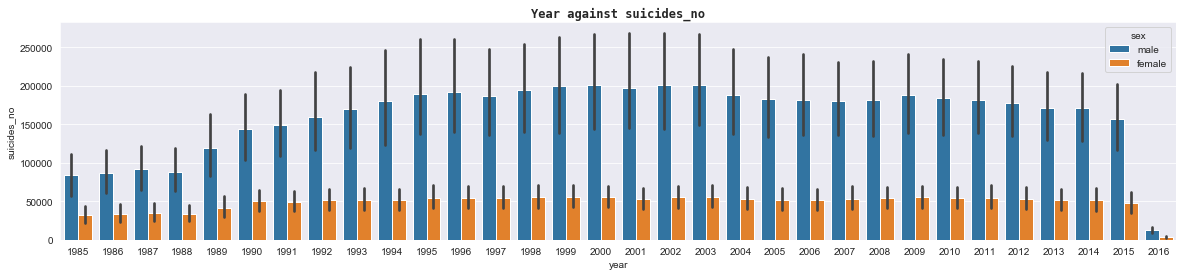

In [22]:
#Steady Increase in Suicide Rates from 1989 up till 2003, with males as the most victims
plt.figure(figsize=(20,4))
plt.title("Year against suicides_no",fontweight='bold', fontfamily='monospace')
sns.barplot(x='year',y='suicides_no', data=df, estimator=np.sum, hue='sex')

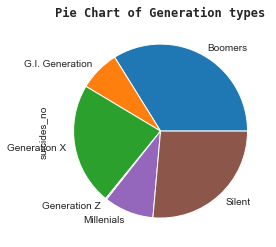

In [23]:
#Boomers make up the most casualties while G.I Generation are the least and this is due to timeframe specified in the dataset
plt.title('Pie Chart of Generation types',fontweight='bold', fontfamily='monospace')
df.groupby('generation')['suicides_no'].sum().plot(kind='pie')

5.Creating Pivot Table

In [24]:
#Creating a pivot table to get suicide aggregation by year for each country with variable name "pivot"
pivot=pd.pivot_table(data=df,values=['suicides_no'],index='country',columns='year',aggfunc='sum',fill_value=0)

In [25]:
#Checking the head of the pivot table
pivot.head(2)

suicides_no                                               \
year                       1985 1986 1987 1988 1989 1990 1991 1992 1993 1994   
country                                                                        
Albania                       0    0   73   63   68    0    0   47   73   50   
Antigua and Barbuda           0    0    0    0    0    1    0    0    1    0   

                     ...                                                    
year                 ... 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016  
country              ...                                                    
Albania              ...  124  160    0   96    0    0    0    0    0    0  
Antigua and Barbuda  ...    1    0    0    0    0    0    0    0    1    0  

[2 rows x 32 columns]

In [26]:
#Checking the tail of the pivot table
pivot.tail(2)

suicides_no                                                    ...  \
year              1985 1986 1987 1988 1989  1990  1991  1992  1993  1994  ...   
country                                                                   ...   
Uruguay            287  262  258  268  344   315     0     0   418   406  ...   
Uzbekistan           0    0    0    0    0  1459  1393  1344  1355  1419  ...   

                                                                    
year       2007 2008  2009  2010  2011  2012  2013  2014 2015 2016  
country                                                             
Uruguay     576  523   511   547     0   599   546   591  630    0  
Uzbekistan    0    0  1399  1464  1640  1835  1950  2095    0    0  

[2 rows x 32 columns]

In [27]:
#This means 101 countries in the dataset over a timespan of 32 years
pivot.shape

(101, 32)

In [28]:
#Here we can see the average, minimum and maximum suicide rates for each year
pivot.describe()

suicides_no                                                          \
year           1985          1986          1987          1988          1989   
count    101.000000    101.000000    101.000000    101.000000    101.000000   
mean    1149.138614   1194.752475   1255.861386   1198.277228   1586.574257   
std     3995.605786   4218.402611   4166.910090   4060.932051   5404.806443   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      3.000000      0.000000      0.000000   
75%      287.000000    326.000000    410.000000    403.000000    465.000000   
max    29446.000000  30892.000000  30783.000000  30388.000000  37921.000000   

                                                                             \
year           1990          1991          1992          1993          1994   
count    101.000000    101.000000    101.000000    101.000000    101.000000   
mean    1914.465347   1960.594059   2093.792079   2193.712871   2297.653465   
std     5599.392114   5612.426914   6093.705446   6868.657677   7338.803894   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       93.000000     80.000000    146.000000    119.000000    123.000000   
75%     1459.000000   1493.000000   1587.000000   1470.000000   1584.000000   
max    39028.000000  39281.000000  45923.000000  55846.000000  61420.000000   

       ...                                                          \
year   ...          2007          2008          2009          2010   
count  ...    101.000000    101.000000    101.000000    101.000000   
mean   ...   2310.970297   2331.158416   2410.762376   2363.386139   
std    ...   6330.886474   6217.324175   6294.065958   6111.454732   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     13.000000     11.000000     36.000000     31.000000   
50%    ...    328.000000    408.000000    447.000000    399.000000   
75%    ...   1379.000000   1439.000000   1530.000000   1604.000000   
max    ...  41149.000000  38211.000000  37408.000000  38362.000000   

                                                                             \
year           2011          2012          2013          2014          2015   
count    101.000000    101.000000    101.000000    101.000000    101.000000   
mean    2341.425743   2278.811881   2209.891089   2207.762376   2016.237624   
std     6058.082710   5923.339607   5876.589300   5839.835520   5827.585557   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       20.000000     10.000000      5.000000      2.000000      0.000000   
50%      369.000000    430.000000    383.000000    382.000000    104.000000   
75%     1650.000000   1658.000000   1738.000000   1617.000000   1251.000000   
max    39508.000000  40596.000000  41143.000000  42769.000000  44189.000000   

                    
year          2016  
count   101.000000  
mean    154.485149  
std     555.074078  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    4117.000000  

[8 rows x 32 columns]

In [29]:
#Confirming all columns are of type integers
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Albania to Uzbekistan
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   (suicides_no, 1985)  101 non-null    int64
 1   (suicides_no, 1986)  101 non-null    int64
 2   (suicides_no, 1987)  101 non-null    int64
 3   (suicides_no, 1988)  101 non-null    int64
 4   (suicides_no, 1989)  101 non-null    int64
 5   (suicides_no, 1990)  101 non-null    int64
 6   (suicides_no, 1991)  101 non-null    int64
 7   (suicides_no, 1992)  101 non-null    int64
 8   (suicides_no, 1993)  101 non-null    int64
 9   (suicides_no, 1994)  101 non-null    int64
 10  (suicides_no, 1995)  101 non-null    int64
 11  (suicides_no, 1996)  101 non-null    int64
 12  (suicides_no, 1997)  101 non-null    int64
 13  (suicides_no, 1998)  101 non-null    int64
 14  (suicides_no, 1999)  101 non-null    int64
 15  (suicides_no, 2000)  101 non-null    int64
 16  (suicides_no, 2001

In [30]:
#Multi index columns of suicides_no for each year, using this we can get information for each column running by running methods like max and min
pivot.columns

MultiIndex([('suicides_no', 1985),
            ('suicides_no', 1986),
            ('suicides_no', 1987),
            ('suicides_no', 1988),
            ('suicides_no', 1989),
            ('suicides_no', 1990),
            ('suicides_no', 1991),
            ('suicides_no', 1992),
            ('suicides_no', 1993),
            ('suicides_no', 1994),
            ('suicides_no', 1995),
            ('suicides_no', 1996),
            ('suicides_no', 1997),
            ('suicides_no', 1998),
            ('suicides_no', 1999),
            ('suicides_no', 2000),
            ('suicides_no', 2001),
            ('suicides_no', 2002),
            ('suicides_no', 2003),
            ('suicides_no', 2004),
            ('suicides_no', 2005),
            ('suicides_no', 2006),
            ('suicides_no', 2007),
            ('suicides_no', 2008),
            ('suicides_no', 2009),
            ('suicides_no', 2010),
            ('suicides_no', 2011),
            ('suicides_no', 2012),
            ('suicid

In [31]:
#For example, like below
print("The highest number of suicide in year 2016 is" + " " + str(pivot[('suicides_no', 2016)].max()))
print("The Lowest number of suicide in year 2016 is" + " " + str(pivot[('suicides_no', 2016)].min()))

The highest number of suicide in year 2016 is 4117
The Lowest number of suicide in year 2016 is 0


In [32]:
#Checking row details in 2016 where suicide number is zero, we see 86 countries having zero suicide cases in the year 2016
pivot[pivot[('suicides_no', 2016)]==0]

suicides_no                                            \
year                        1985   1986   1987   1988   1989   1990   1991   
country                                                                      
Albania                        0      0     73     63     68      0      0   
Antigua and Barbuda            0      0      0      0      0      1      0   
Argentina                   1988   2284   2286   2354   2247   2140   1951   
Aruba                          0      0      0      0      0      0      0   
Australia                   1861   2044   2164   2172   2066   2202   2288   
...                          ...    ...    ...    ...    ...    ...    ...   
United Arab Emirates           0      0      0      0      0      0      0   
United Kingdom              5105   4839   4594   4971   4361   4643   4547   
United States              29446  30892  30783  30388  30218  30895  30790   
Uruguay                      287    262    258    268    344    315      0   
Uzbekistan                     0      0      0      0      0   1459   1393   

                                           ...                              \
year                   1992   1993   1994  ...   2007   2008   2009   2010   
country                                    ...                               
Albania                  47     73     50  ...    124    160      0     96   
Antigua and Barbuda       0      1      0  ...      1      0      0      0   
Argentina              2184   2230   2241  ...   2946   3059   2884   2943   
Aruba                     0      0      0  ...      8      4      4      7   
Australia              2251   2038   2283  ...   2229   2341   2337   2420   
...                     ...    ...    ...  ...    ...    ...    ...    ...   
United Arab Emirates      0      0      0  ...    101    100    124    111   
United Kingdom         4628   4462   4380  ...   3897   4259   4246   4188   
United States         30471  31084  31123  ...  34596  36030  36900  38362   
Uruguay                   0    418    406  ...    576    523    511    547   
Uzbekistan             1344   1355   1419  ...      0      0   1399   1464   

                                                              
year                   2011   2012   2013   2014   2015 2016  
country                                                       
Albania                   0      0      0      0      0    0  
Antigua and Barbuda       0      0      0      0      1    0  
Argentina              2912   3248   2987   3231   3073    0  
Aruba                     9      0      0      0      0    0  
Australia              2392   2580   2608   2891   3027    0  
...                     ...    ...    ...    ...    ...  ...  
United Arab Emirates      0      0      0      0      0    0  
United Kingdom         4393   4444   4824   4788   4910    0  
United States         39508  40596  41143  42769  44189    0  
Uruguay                   0    599    546    591    630    0  
Uzbekistan             1640   1835   1950   2095      0    0  

[86 rows x 32 columns]

In [33]:
#Checking row details in 2016 where suicide number is 4117, we can see that it's Thailand that has the highest number of suicide cases in 2016
pivot[pivot[('suicides_no', 2016)]==4117]

suicides_no                                                     ...  \
year            1985  1986  1987 1988 1989  1990  1991  1992 1993  1994  ...   
country                                                                  ...   
Thailand        2982  2798  3035    0    0  3753  3559  3550    0  2307  ...   

                                                                      
year      2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
country                                                               
Thailand  3754  3778  3787  3761  3873  3985  3961  3952  4205  4117  

[1 rows x 32 columns]

In [34]:
#Using the index method, we can check row level information in the dataset
pivot.index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       ...
       'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan'],
      dtype='object', name='country', length=101)

In [35]:
#Using the loc method, we can get the suicide cases for each year in a particular country for example the "United Kingdom"
pivot.loc['United Kingdom']

             year
suicides_no  1985    5105
             1986    4839
             1987    4594
             1988    4971
             1989    4361
             1990    4643
             1991    4547
             1992    4628
             1993    4462
             1994    4380
             1995    4315
             1996    4165
             1997    4143
             1998    4389
             1999    4448
             2000    4290
             2001    4128
             2002    4117
             2003    3979
             2004    4183
             2005    4047
             2006    4122
             2007    3897
             2008    4259
             2009    4246
             2010    4188
             2011    4393
             2012    4444
             2013    4824
             2014    4788
             2015    4910
             2016       0
Name: United Kingdom, dtype: int64

In [36]:
pivot[pivot[('suicides_no', 1985)]==29446]

suicides_no                                                   \
year                 1985   1986   1987   1988   1989   1990   1991   1992   
country                                                                      
United States       29446  30892  30783  30388  30218  30895  30790  30471   

                             ...                                            \
year            1993   1994  ...   2007   2008   2009   2010   2011   2012   
country                      ...                                             
United States  31084  31123  ...  34596  36030  36900  38362  39508  40596   

                                         
year            2013   2014   2015 2016  
country                                  
United States  41143  42769  44189    0  

[1 rows x 32 columns]

In [37]:
pivot[pivot[('suicides_no', 1989)]==30218]

suicides_no                                                   \
year                 1985   1986   1987   1988   1989   1990   1991   1992   
country                                                                      
United States       29446  30892  30783  30388  30218  30895  30790  30471   

                             ...                                            \
year            1993   1994  ...   2007   2008   2009   2010   2011   2012   
country                      ...                                             
United States  31084  31123  ...  34596  36030  36900  38362  39508  40596   

                                         
year            2013   2014   2015 2016  
country                                  
United States  41143  42769  44189    0  

[1 rows x 32 columns]

6. Basic Correlations Analysis

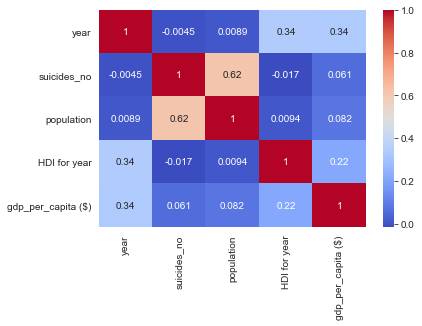

In [38]:
#Population has a fair correlation with the suicide no
sns.heatmap(df.drop(['suicides per 100k pop'],axis=1).corr(), cmap='coolwarm', annot=True)

Text(0.5, 1, 'Regression plot of Population against Suicides_no')

<Figure size 720x288 with 0 Axes>

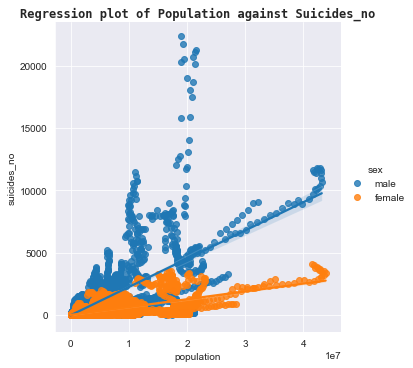

In [39]:
#Regression plot of population against suicide number
plt.figure(figsize=(10,4))
sns.lmplot(x='population',y='suicides_no',data=df,hue='sex')
plt.title('Regression plot of Population against Suicides_no',fontweight='bold', fontfamily='monospace')

# Overall Verdicts

1.Majority of suicide victims are males.

2.Most suicide victims are between 35-54 years.

3.Boomers(born from 1946 to 1964) constitute a large number of suicide victims.

4.As per dataset, a steady increase in suicide rates being witnessed from 1989 up till 2004, then it flattens before experiencing a steep drop in 2016.

5.Fairly strong correlation between a country's population and it's suicide victims.

6.The Russian federation has the record for most suicide cases followed by the United States and Japan(Reference PowerBI visual link)

# Work in Progress